In [42]:
# Import libraries to be used in script
import pandas
%matplotlib inline

In [43]:
# Import stock indices' data files
dow30 = pandas.read_csv('C:\Users\ChrisGomes\Projects\MediaStock\dow30.csv')
nasdaq = pandas.read_csv('C:\Users\ChrisGomes\Projects\MediaStock\\nasdaq.csv')
sp500 = pandas.read_csv('C:\Users\ChrisGomes\Projects\MediaStock\s&p500.csv')

In [44]:
# Calculate the market cap of each index for comparison
dow30['CloseCap'] = dow30['Close'] * dow30['Volume']
nasdaq['CloseCap'] = nasdaq['Close'] * nasdaq['Volume']
sp500['CloseCap'] = sp500['Close'] * sp500['Volume']

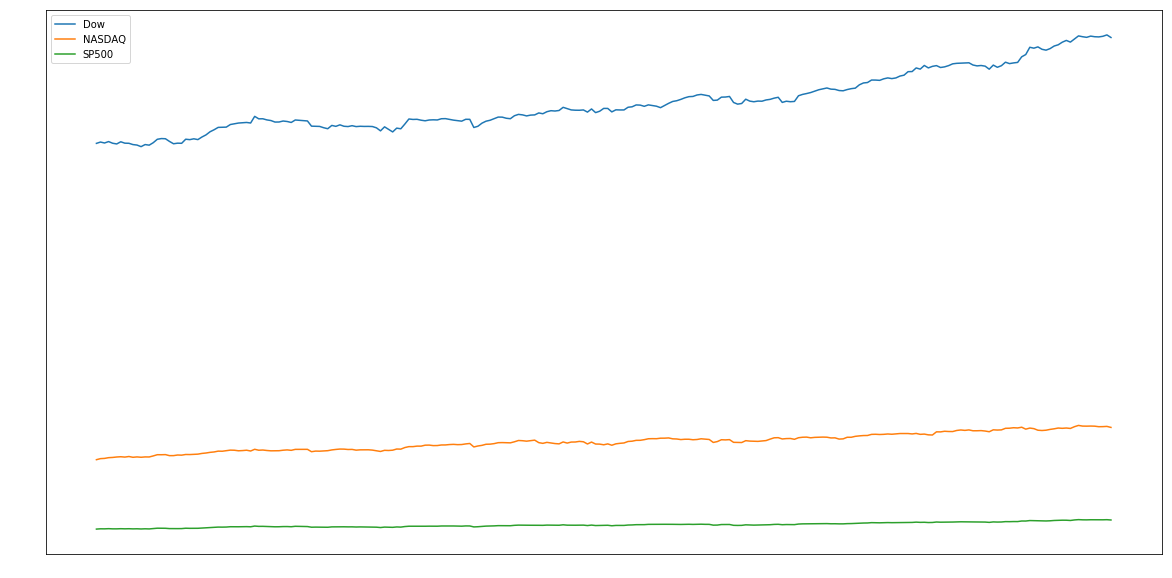

In [46]:
# Create a data frame to compare all of the index prices and graph it
caps = pandas.concat([dow30['Date'], dow30['Close'], nasdaq['Close'], sp500['Close']],
                     axis=1,
                     keys=['Date', 'Dow', 'NASDAQ', 'SP500'])
caps.plot(kind='line', figsize=(20, 10)).tick_params(colors='white')

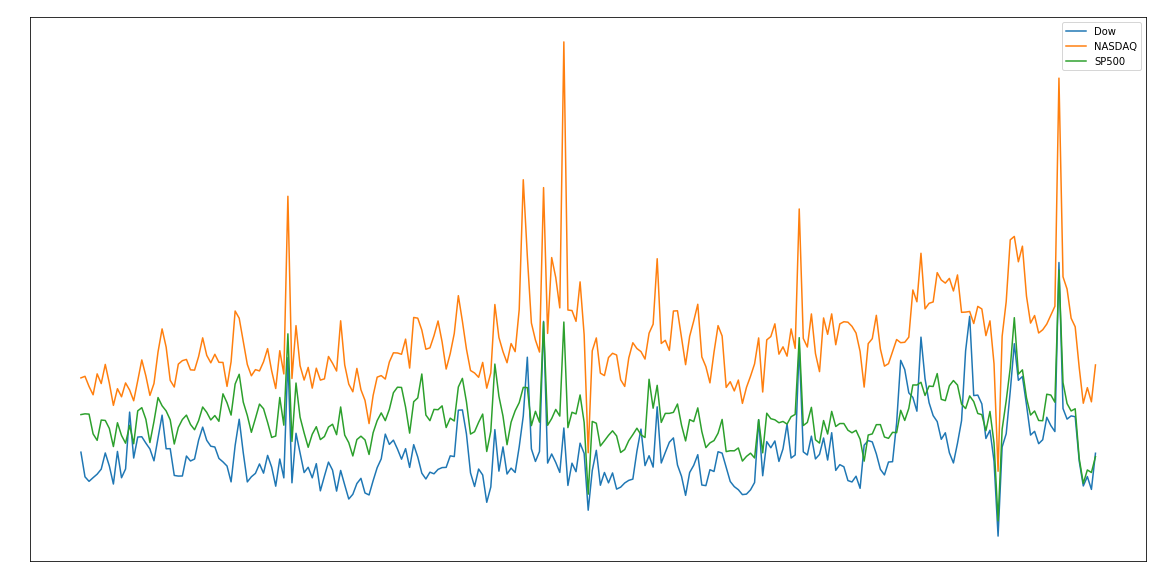

In [47]:
# Create a data frame to compare all of the index caps and graph it
caps = pandas.concat([dow30['Date'], dow30['CloseCap'], nasdaq['CloseCap'], sp500['CloseCap']],
                     axis=1,
                     keys=['Date', 'Dow', 'NASDAQ', 'SP500'])
caps.plot(kind='line', figsize=(20, 10)).tick_params(colors='white')

In [54]:
# Convert the date columns to a date types
dow30['Date'] = pandas.to_datetime(dow30['Date'])
nasdaq['Date'] = pandas.to_datetime(nasdaq['Date'])
sp500['Date'] = pandas.to_datetime(sp500['Date'])

In [55]:
# Get just the year and month from the date columns
dow30['YearMonth'] = dow30.Date.dt.to_period('M')
nasdaq['YearMonth'] = nasdaq.Date.dt.to_period('M')
sp500['YearMonth'] = sp500.Date.dt.to_period('M')

In [56]:
# Aggregate on each month and find the min volume
dow30Min = dow30.groupby(by=['YearMonth'])['Volume'].min().reset_index()
nasdaqMin = nasdaq.groupby(by=['YearMonth'])['Volume'].min().reset_index()
sp500Min = sp500.groupby(by=['YearMonth'])['Volume'].min().reset_index()

In [57]:
# Aggregate on each month and find the max volume
dow30Max = dow30.groupby(by=['YearMonth'])['Volume'].max().reset_index()
nasdaqMax = nasdaq.groupby(by=['YearMonth'])['Volume'].max().reset_index()
sp500Max = sp500.groupby(by=['YearMonth'])['Volume'].max().reset_index()

In [58]:
# Find the percent difference from the min to the max and the average across the three
dow30PercentChange = (dow30Max['Volume'] - dow30Min['Volume']) / dow30Min['Volume']
nasdaqPercentChange = (nasdaqMax['Volume'] - nasdaqMin['Volume']) / nasdaqMin['Volume']
sp500PercentChange = (sp500Max['Volume'] - sp500Min['Volume']) / sp500Min['Volume']
averagePercentChange = (dow30PercentChange + nasdaqPercentChange + sp500PercentChange) / 3

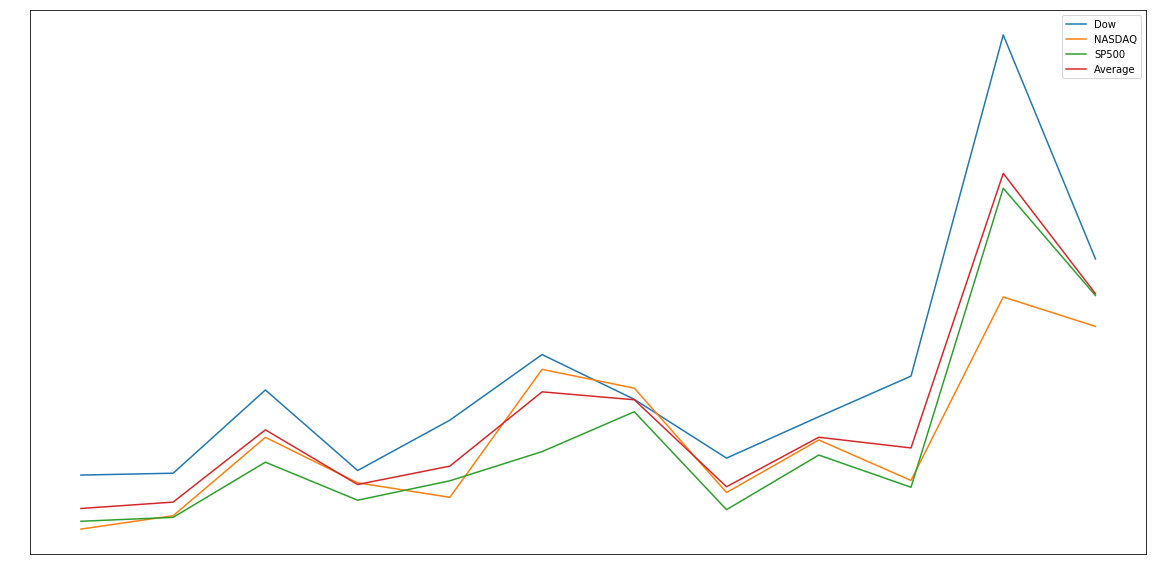

In [59]:
# Graph the percent change for each index during each month
percentChanges = pandas.concat([dow30Min['YearMonth'], dow30PercentChange, nasdaqPercentChange, sp500PercentChange, averagePercentChange],
                               axis=1,
                               keys=['Month', 'Dow', 'NASDAQ', 'SP500', 'Average'])
percentChanges.plot(kind='line', figsize=(20,10)).tick_params(colors='white')

In [61]:
# Notes:
# - percent difference in volume highest in Feb, May, Jun and Oct (respose to financial reportings)
# - year for high growth in stock prices (just optimism or actual value creation?)
# - the three markets have moved relatively close to each other, which same predictor can be used for each index, they can be treated similarly
#   and chances it was general market positivety that caused the rise and not outlier companies